<a href="https://colab.research.google.com/github/LeoFernanndes/notebooks/blob/master/MLAZ_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf


plt.style.use("seaborn-white")

## Artificial Neural Network

Accuracy score 86.1% 



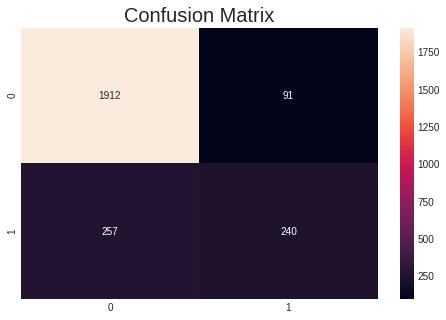

In [45]:
url = "https://raw.githubusercontent.com/LeoFernanndes/ML-A-a-Z/master/Part%208%20-%20Deep%20Learning/Section%2039%20-%20Artificial%20Neural%20Networks%20(ANN)/Python/Churn_Modelling.csv"
df = pd.read_csv(url)
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values


from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1])], remainder="passthrough")
X = np.array(ct.fit_transform(X))


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
ann.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)

y_pred = ann.predict(X_test)
y_pred = pd.Series([1 if pred > 0.5 else 0 for pred in y_pred])


from sklearn.metrics import accuracy_score


acc = accuracy_score(y_test, y_pred)
print("Accuracy score {:.1f}% \n".format(100 * acc))


from sklearn.metrics import confusion_matrix
import seaborn as sns


plt.figure(figsize=(8, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

## Convolutional Neural Network